<a href="https://colab.research.google.com/github/FuManWai/Web_Scraping_Booking.com/blob/main/Web_Scraping.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing libraries

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import requests
from bs4 import BeautifulSoup

# Data Collection

First of all, we need to scrapes hotel information, including the name, location, price, rating, and review, from multiple pages of Booking.com search results in Toronto.

In [ ]:
#Initialize an empty list named hotels_data to store the scraped hotel information
hotels_data = []

#Paginate through multiple pages of hotel listings on Booking.com
for i in range(0, 200, 25):

  # Make the HTTP request
  url = f'https://www.booking.com/searchresults.en-gb.html?label=gen173nr-1BCAEoggI46AdIM1gEaCeIAQGYAQm4AQfIAQzYAQHoAQGIAgGoAgO4ApqehaoGwAIB0gIkZjhlNTRjOGQtNzc5YS00M2Q0LWEzYWQtNGZlNDIyNGRlOGYz2AIF4AIB&sid=6404e3f02159587f4ed1219ddbc14046&aid=304142&ss=Toronto&ssne=Toronto&ssne_untouched=Toronto&efdco=1&lang=en-gb&sb=1&src_elem=sb&src=searchresults&dest_id=-574890&dest_type=city&checkin=2023-11-11&checkout=2023-11-12&group_adults=1&no_rooms=1&group_children=0&offset={i}'
  headers = {'User-Agent': 'Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/118.0.0.0 Safari/537.36'}
  response  = requests.get(url, headers=headers)

  # Parse the HTML content with Beautiful Soup
  soup = BeautifulSoup(response.content, 'html.parser')

  # Find all the hotel elements in the HTML document
  hotels = soup.find_all('div', {'data-testid': 'property-card'})

  for hotel in hotels:
      # Extract the hotel name
      name_element = hotel.find('div', {'data-testid': 'title'})
      name = name_element.text.strip()

      # Extract the hotel location
      location_element = hotel.find('span', {'data-testid': 'address'})
      location = location_element.text.strip()

      # Extract the hotel price
      price_element = hotel.find('span', {'data-testid': 'price-and-discounted-price'})
      price = price_element.text.strip()

      # Extract the hotel rating
      rating_element = hotel.find('div', {'class': 'a3b8729ab1 d86cee9b25'})

      if rating_element is not None:
        rating = rating_element.text.strip()
      else:
        rating = "No Rating"

      # Extract the hotel review
      review_element = hotel.find('div', {'class': 'abf093bdfe f45d8e4c32 d935416c47'})

      if review_element is not None:
        review = review_element.text.strip()
      else:
        review = "No Review"

      # Append hotes_data with info about hotel
      hotels_data.append({
        'Name': name,
        'Location': location,
        'Price': price,
        'Rating': rating,
        'Review': review
      })

The data is parsed and structured using Beautiful Soup and stored in a Pandas DataFrame

In [ ]:
hotels = pd.DataFrame(hotels_data)
hotels.head()

,Name,Location,Price,Rating,Review
0,Samesun Toronto,"Downtown Toronto, Toronto",US$66,7.4,"2,121 reviews"
1,Condo Room for rent,Toronto,US$144,No Rating,No Review
2,Exec Suite in New Luxury Condo with Lake Views,"Old Town Toronto, Toronto",US$263,No Rating,9 external reviews
3,Chelsea Hotel Toronto,"Downtown Toronto, Toronto",US$135,7.1,"6,417 reviews"
4,The Clarence Park,"Downtown Toronto, Toronto",US$40,7.7,"3,541 reviews"


Export data from a DataFrame to a CSV file which contain the column names and row indices will be omitted

In [ ]:
hotels.to_csv('hotels.csv', header=True, index=False)

# Data Analysis

## Finding the top 5 hotels with the most reviews

The code first filters out hotels with "No Review." It then transforms review strings into numeric values representing the number of reviews.

In [ ]:
# Filter out hotels with 'No Review'
filtered_hotels_data = [hotel for hotel in hotels_data if hotel['Review'] != 'No Review']

# Create an empty list numeric_reviews to store the numeric review values
numeric_reviews = []

# Convert review strings to numeric values
for hotel in filtered_hotels_data:
    review_str = hotel['Review']
    numeric_value = int(review_str.split()[0].replace(',', ''))
    numeric_reviews.append(numeric_value)

These numeric values are added to the dataset, allowing hotels to be sorted based on their review counts.

In [ ]:
# Add the numeric review values to the filtered_hotels_data list
for i, hotel in enumerate(filtered_hotels_data):
    hotel['NumericReview'] = numeric_reviews[i]

# Sort the hotels based on the numeric review values
sorted_hotels = sorted(filtered_hotels_data, key=lambda hotel: hotel['NumericReview'], reverse=True)

Only show the top 5 hotels with their review counts

In [ ]:
# Display the top 5 hotels with the most reviews
top_n = 5
top_hotels = sorted_hotels[:top_n]

# Print the top hotels and their review counts
print(f"Top {top_n} Hotels by Number of Reviews:")
for i, hotel in enumerate(top_hotels, start=1):
    print(f"{i}. {hotel['Name']} - {hotel['Review']}")

Top 5 Hotels by Number of Reviews:
1. One King West Hotel and Residence - 11,064 reviews
2. One King West Hotel and Residence - 11,064 reviews
3. Chelsea Hotel Toronto - 6,417 reviews
4. DoubleTree by Hilton Toronto Downtown - 5,162 reviews
5. Town Inn Suites Hotel - 4,124 reviews


One King West Hotel and Residence is a popular choice with an impressive number of reviews. It's likely well-liked by travelers. Consider this hotel if you're looking for a tried-and-tested option with a central location.

## Creating a histogram to visualize the distribution of hotel prices


Price strings are then converted into numeric values after removing currency symbols and non-numeric characters. Hotels with prices that cannot be converted are filtered out.

In [ ]:
# Extract prices from the data
prices = [hotel['Price'] for hotel in hotels_data]

# Function to convert a price string to a numeric value
def extract_price_numeric(price_str):
    # Remove currency symbols, commas, or any other non-numeric characters
    price_cleaned = price_str.replace('US$', '').replace(',', '').strip()
    try:
        return float(price_cleaned)
    except ValueError:
        return None

# Convert prices to numeric values
numeric_prices = [extract_price_numeric(price) for price in prices]

# Filter out None values (prices that couldn't be converted)
numeric_prices = [price for price in numeric_prices if price is not None]

Basic statistics, such as the average, minimum, and maximum prices, are calculated. Additionally, a histogram is generated to visualize the distribution of hotel prices.

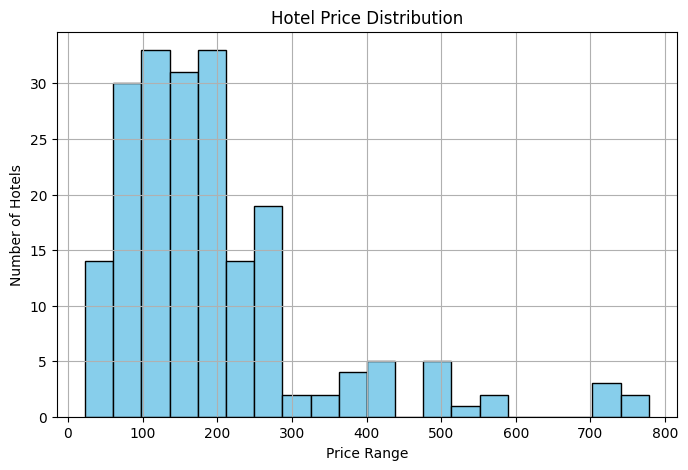

Total Number of Hotels: 200
Average Price: $195.62
Minimum Price: $23.00
Maximum Price: $778.00


In [ ]:
# Calculate statistics
average_price = np.mean(numeric_prices)
min_price = min(numeric_prices)
max_price = max(numeric_prices)
total_hotels = len(numeric_prices)

# Create a histogram of price distribution
plt.figure(figsize=(8, 5))
plt.hist(numeric_prices, bins=20, color='skyblue', edgecolor='black')
plt.title('Hotel Price Distribution')
plt.xlabel('Price Range')
plt.ylabel('Number of Hotels')
plt.grid(True)
plt.show()

# Display the results
print(f"Total Number of Hotels: {total_hotels}")
print(f"Average Price: ${average_price:.2f}")
print(f"Minimum Price: ${min_price:.2f}")
print(f"Maximum Price: ${max_price:.2f}")

The varying heights of the bars between the minimum and maximum prices highlight the variability in hotel pricing. Travelers can choose from a wide spectrum of options, making it essential to consider their budget and preferences when selecting accommodation.

To strike a balance between affordability and quality, look for hotels around the average price range ($195.62). These hotels might offer a decent blend of comfort and value for your money.

## Creating a box plot to visualize the distribution of ratings

We first filter out hotels with "No Rating." and calculates quartiles and the median, also the average, highest, and lowest ratings.

In [ ]:
# Filter out hotels with 'No Rating'
filtered_ratings = [float(hotel['Rating']) for hotel in filtered_hotels_data if hotel['Rating'] != 'No Rating']

# Calculate quartiles and median
quartiles = np.percentile(filtered_ratings, [25, 50, 75])
# Calculate average, max and min
average_rating = round(sum(ratings) / len(ratings), 1)
highest_rating = max(ratings)
lowest_rating = min(filtered_ratings)

It then creates a box plot to visually represent the distribution of hotel ratings.


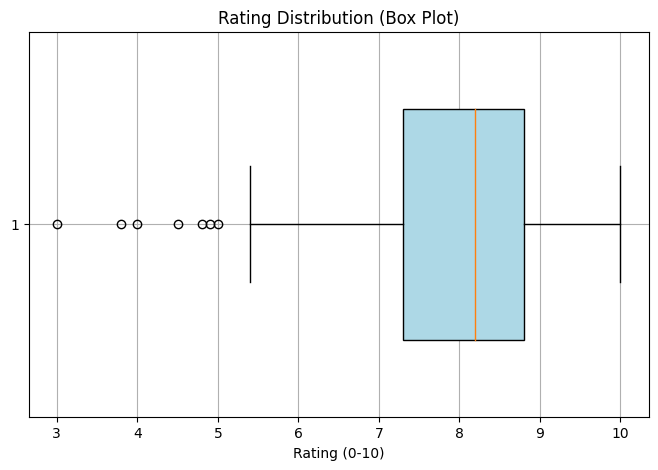

Q1 (25th Percentile): 7.30
Median (50th Percentile): 8.20
Q3 (75th Percentile): 8.80
Average Rating: 6.8
Highest Rating: 10.0
Lowest Rating: 3.0


In [ ]:
# Create a box plot
plt.figure(figsize=(8, 5))
box = plt.boxplot(filtered_ratings, vert=False, widths=0.6, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Rating Distribution (Box Plot)')
plt.xlabel('Rating (0-10)')
plt.grid(True)

# Display the box plot
plt.show()

# Print quartile and median values below the plot
print(f'Q1 (25th Percentile): {quartiles[0]:.2f}')
print(f'Median (50th Percentile): {quartiles[1]:.2f}')
print(f'Q3 (75th Percentile): {quartiles[2]:.2f}')
print(f"Average Rating: {average_rating:.1f}")
print(f"Highest Rating: {highest_rating}")
print(f"Lowest Rating: {lowest_rating if lowest_rating != -1 else 'No Rating'}")

For travelers seeking a balanced experience with moderate to high-quality accommodations, it's advisable to focus on hotels with ratings within the IQR, which ranges from 7.30 to 8.80. These hotels are likely to offer consistent quality and service.

If you're looking for a luxurious or exceptional experience, consider exploring hotels with ratings above 8.80. These are the high outliers in the dataset and may offer top-tier amenities and services.

# Conclusion

The analysis provides valuable insights into hotel data in Toronto. It helps users identify the most popular hotels based on the number of reviews, understand the price distribution, and gain insights into the rating distribution. It's a useful tool for making informed decisions when planning a trip or booking accommodation in Toronto.